# Titanic Machine Learning Problem

### Step 1: Data Import and Exploration (EDA)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load data
train_df = pd.read_csv("data/train.csv").set_index('PassengerId')
test_df = pd.read_csv("data/test.csv").set_index('PassengerId')

Run some quick checks on data structure, column names, typical values, data types, etc

In [2]:
train_df.shape

(891, 11)

In [3]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are a significant number of null entries in the age and cabin columns which must be dealt with later. Now look at the distribution and properties of numerical and categorical/text data:

In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Define categorical and continous columns

In [7]:
cat_cols = ['Pclass', 'Sex', 'Embarked']
cont_cols = ['Age', 'Fare', 'SibSp', 'Parch']

Look at the correlation between individual features and the response:

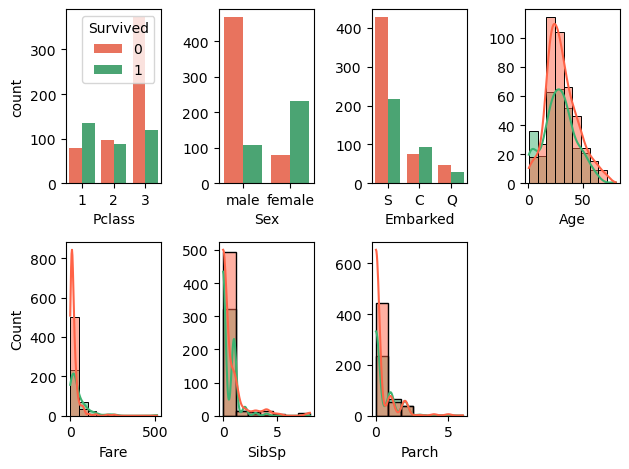

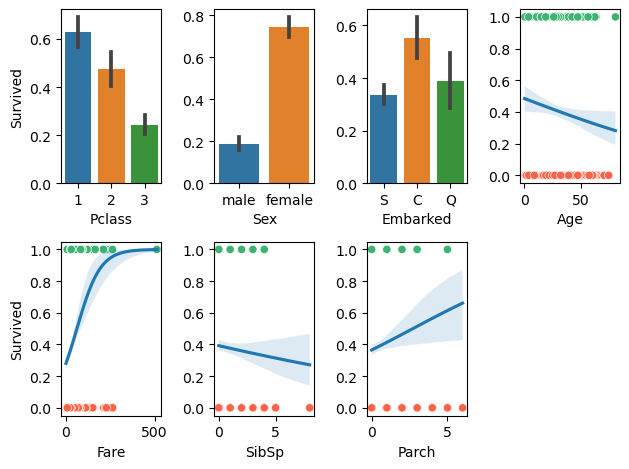

In [8]:
# Choose number of cols and calc number of rows to plot on
n_cols = 4
n_rows = math.ceil((len(cat_cols) + len(cont_cols))/4)

# Create grid of subplots for count and response plots
cnt_fig, cnt_axs = plt.subplots(nrows=n_rows, ncols=n_cols)
res_fig, res_axs = plt.subplots(nrows=n_rows, ncols=n_cols)

# Flatten ax for iteration
cnt_axs = cnt_axs.flatten()
res_axs = res_axs.flatten()

# Plot categorical columns first
for i, col in enumerate(cat_cols):
    sns.countplot(data=train_df, x=col, hue='Survived', palette=["tomato","mediumseagreen"], ax = cnt_axs[i])
    sns.barplot(data=train_df, x=col, y='Survived', ax = res_axs[i]) 
    if i!=0:
        cnt_axs[i].get_legend().remove()
    if i%n_cols!=0:
        cnt_axs[i].set(ylabel=None)
        res_axs[i].set(ylabel=None)

# Plot continous columns
for i, col in enumerate(cont_cols):
    i=i+len(cat_cols)
    sns.histplot(data=train_df, x=col, hue='Survived', kde=True, palette=["tomato","mediumseagreen"], bins=min(10,len(train_df[col].unique())), legend=None, ax=cnt_axs[i])
    sns.scatterplot(data=train_df, x=col, y='Survived', hue='Survived', palette=["tomato","mediumseagreen"], legend=None, ax=res_axs[i])
    sns.regplot(data=train_df, x=col, y='Survived', scatter=False, logistic=True, ax=res_axs[i])
    if i%n_cols!=0:
        cnt_axs[i].set(ylabel=None)
        res_axs[i].set(ylabel=None)
    
# Remove unused subplots
if len(cat_cols) + len(cont_cols) < n_rows*n_cols:
    for i in range(len(cat_cols) + len(cont_cols), n_rows*n_cols):
        cnt_fig.delaxes(cnt_axs[i])
        res_fig.delaxes(res_axs[i])
        
cnt_fig.tight_layout()
res_fig.tight_layout()

The following observations are made:

* Higher class passengers have higher survival rate
* Females have significantly better survival rate
* Higher number of siblings/spouses associated with lower rate of survival, but low sample sizes for SibSp > 1
* Passengers embarking from 'C' have marginally better survival rate, although most passengers embarked from 'S'
* Age may have some relationship with survival rate, but may be a result of correlation of age with class
* Increase fair increases survival rate (aligned with class), although there is an outlier in fare that must be removed.

Having investigated relationships between features and response, now look at relationships between all variables using a correlation matrix: 

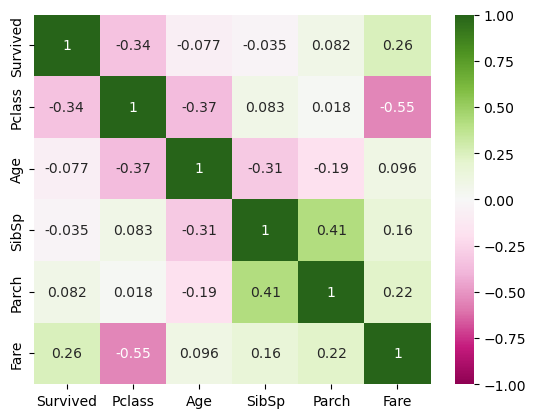

In [9]:
correlations = train_df.corr(numeric_only=True)
sns.heatmap(correlations, annot = True, cmap = 'PiYG', vmin=-1, vmax=1);

The following observations are made:

* Correlation between class and survival rate confirmed
* Correlation between age and class exists, but correlation between age and surival rate is less obvious.
* Correlation between fare and survival rate confirmed
* Correlation between fare and class strong

Let's have a look at outliers

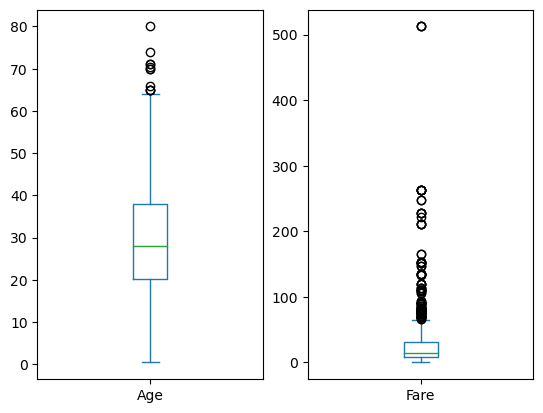

In [10]:
train_df[cont_cols[0:2]].plot(kind='box', subplots=True, sharey=False);

There are outliers in age and fare as expected. The Age outliers are simply characteristics of the dataset and do not vary significantly from the typicaly distribution of age, and are therefore retained.

The cluster of fare outliers around 200-300 and 500 could cause issues if our ML algorithm is not robust in dealing with outliers. At this stage it appears safety to remove these outliers are they different significantly from the typical distribution of fare.

### Step 2: Pre-process Data

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

Remove features that are definitely not going to be used at this point:
* Passenger name contains title, but is of limited use given that there is sex feature
* Ticket number is not useful
* Cabin contains a large number of nulls and is not useable.

In [12]:
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Now remove outliers based on the 'Fare' feature

In [13]:
z_scores = np.abs((train_df['Fare'] - np.mean(train_df['Fare'])) / np.std(train_df['Fare']))
train_df = train_df[z_scores < 3]

Specify which of the remaining features are categorical, which are numerical and what the response is. Unspecified features will not be processed.

In [14]:
cat_features = ['Pclass', 'Sex', 'Embarked']
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
response = ['Survived']

Create transformer for numerical features, which:

* Uses SibSp and Parch to calculate family size variable (use custom transformer)
* Deals with null values (sets to mean)
* Scales features between 0-1 using standard scaling

In [15]:
# Custom transformer to add family size
class AddFamilyMembers(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['FamilyMembers'] = X['SibSp'] + X['Parch']
        X = X.drop('SibSp', axis=1)
        X = X.drop('Parch', axis=1)
        return X
    def get_feature_names(self):
        return 'FamilyMembers'
    
# Numerical transformer
num_transformer = Pipeline(steps = 
                           [('add_family_members', AddFamilyMembers()),
                            ('impute_med', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

Create transformer for categorical features, which:
* Deals with null values (sets to mode)
* Numerically encodes features

In [16]:
# Categorical transformer
cat_transformer = Pipeline(steps =
                           [('impute_mode', SimpleImputer(strategy='most_frequent')),
                            ('encode_1h', OneHotEncoder(drop='first'))])

Combine transformers to define pre-processing pipeline and then add to overall classifier pipeline:

In [17]:
preprocessor = ColumnTransformer(transformers =
                                 [('num', num_transformer, num_features),
                                  ('cat', cat_transformer, cat_features)],
                                   remainder = 'passthrough')
clf = Pipeline(steps=
            [('preprocessor', preprocessor)])

Apply the transformer to the training data

In [18]:
X_train_data_pp = clf.fit_transform(train_df)

For the purposes of visualisation and checking, create a dataframe containing the pre-processed training data, defining a function to name columns appropriately.

In [19]:
def get_column_names(transformer):
    col_names = []
    list_transformers = transformer.transformers_
    for single_transformer in list_transformers:
        if isinstance(single_transformer[1],Pipeline): 
            idx = -2 if isinstance(single_transformer[1][-1], StandardScaler) else -1
            col_names = col_names + list(single_transformer[1][idx].get_feature_names_out())
        else:
            pass
    
    return col_names

cols = get_column_names(preprocessor) + ['Survived']
train_df_pp = pd.DataFrame(X_train_data_pp)
train_df_pp.columns = cols

View training data

In [20]:
train_df_pp.head(5)

,Age,Fare,FamilyMembers,x0_2,x0_3,x1_male,x2_Q,x2_S,Survived
0,-0.588566,-0.657256,0.072580,0.0,1.0,1.0,0.0,1.0,0.0
1,0.640628,1.525623,0.072580,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.281268,-0.634246,-0.553329,0.0,1.0,0.0,0.0,1.0,1.0
3,0.410154,0.905759,0.072580,0.0,0.0,0.0,0.0,1.0,1.0
4,0.410154,-0.629984,-0.553329,0.0,1.0,1.0,0.0,1.0,0.0


### Step 3 - Model Selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

Isolate the features and response before feeding ML models. The cross_validation function that we will use requires data in dataframe format. Remember that the preprocessing step will still be completed before model fitment:

In [22]:
y_train = train_df.iloc[:,0]
X_train = train_df.iloc[:,1:]

Define a list of models to test. Because we are performing classification, the following algorithms will be explored:
* Logistic Regression
* k Nearest Neighbours
* Support vector machine
* Decision Tree Classifier
* Random Forest Classifier
* Gradient Boosted Decision Tree

In [23]:
models = [('Logistic Regression', LogisticRegression()),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boosting', GradientBoostingClassifier())]

Define a list of metrics to evaluate the machine learning models against:

* Fit time: Time taken to fit model on training data
* Score time: Time take to predict on test data
* Accuracy: Proportion of correct predictions made on test data
* Precision: Proportion of true positive predictions made on test data out of all positive predictions made
* Recall: Proportion of true positive predictions made on test data out of all actual positive instances in test data
* F1: Mean of precision and recall
* Area under ROC: Area under the plot of true positive rate against false negative rate

In [24]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

Create a test pipeline (seperate to our core clf pipeline) to individually check each model and evaluate it. Apply cross-validation, which involves fitting multiple models (per model selection) against different splits of training data, before aggregating evaluation metrics:

In [25]:
model_performance = pd.DataFrame()
for name, model in models:
    test_pipeline = Pipeline(steps =
                             [('preprocessor', preprocessor),
                              ('model', model)])
    cv_results = cross_validate(estimator=test_pipeline, X=X_train, y=y_train, cv=10, scoring=scoring, error_score='raise')
    cv_result = pd.DataFrame.from_dict(cv_results).mean()
    cv_result.name = name
    model_performance = pd.concat([model_performance,cv_result], axis=1)

In [26]:
model_performance.T.sort_values('test_accuracy', ascending = False)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
SVM,0.067775,0.026428,0.822093,0.817614,0.691728,0.742470,0.796195
Gradient Boosting,0.275022,0.021761,0.816147,0.799480,0.691176,0.735526,0.791256
K-Nearest Neighbors,0.026639,0.026809,0.806131,0.772041,0.704228,0.730047,0.785844
Random Forest,0.437959,0.040837,0.805973,0.758524,0.728493,0.736982,0.790635
Logistic Regression,0.039033,0.022645,0.799075,0.772525,0.676103,0.715299,0.774626
Decision Tree,0.028295,0.022121,0.778541,0.711483,0.713787,0.706519,0.765855


In the context of the Titanic dataset, where the classes are somewhat imbalanced (approximately 60% of the passengers did not survive), precision and recall are important metrics to consider alongside accuracy. Based on the results in the table, the model with the highest F1 score is the Gradient Boosting model, which also has the highest recall score. However, the Random Forest model has the highest precision score, which could be important if minimizing false positives (i.e., predicting someone will survive when they actually did not) is a priority. The SVM and K-Nearest Neighbors models also perform reasonably well across most metrics.

With it's highest overall accuracy, a Gradient Boosting algorithm will be chosen to go forwards

In [27]:
clf.steps.append(('model',GradientBoostingClassifier()))

### Step 4 - Hyperparameter Tuning

Now we look to optimise the Gradient Boosted Decision Tree classifier through tuning hyper-parameters. We are going to apply a simple grid search approach to tune tree-specific and boosting parameters:

In [28]:
from sklearn.model_selection import GridSearchCV

Define parameters to tune, including grid of values to test for each:
* n_estimators: Number of sequential trees / boosting stages to be modelled.
* learning_rate: Contribution of each tree to the final ensemble.
* max_depth: Maximum depth of tree (should be based on number of records)
* min_samples_split: Minumum number of observations required in a node to be considered for splitting (0.5-1% total records)
* min_samples_leaf: Minimum samples required in a terminal node or leaf.
* subsample: Fraction of observations to be selected for each tree

In [41]:
# Use model__ to pass parameters to classifier only (as opposed to preprocessor)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 4, 6],
#    'model__min_samples_leaf': [2, 4, 6],
#    'model__subsample': [0.7, 0.8, 0.9]
}

Perform hyperparameter tuning, using accuracy as the target function:

In [44]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_fit = grid_search.fit(X_train, y_train)

Visualise results

In [55]:
print(grid_fit.best_estimator_[1])
pd.DataFrame(grid_fit.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=6)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.429923,0.063478,0.024882,0.013795,0.2,3,6,100,"{'model__learning_rate': 0.2, 'model__max_dept...",0.822857,0.839080,0.862069,0.833333,0.821839,0.835836,0.014624,1
32,1.190915,0.042426,0.020786,0.003917,0.1,3,4,300,"{'model__learning_rate': 0.1, 'model__max_dept...",0.828571,0.821839,0.873563,0.821839,0.833333,0.835829,0.019361,2
29,1.388285,0.280195,0.020786,0.003917,0.1,3,2,300,"{'model__learning_rate': 0.1, 'model__max_dept...",0.828571,0.816092,0.856322,0.827586,0.839080,0.833530,0.013522,3
31,0.811821,0.045992,0.022190,0.005943,0.1,3,4,200,"{'model__learning_rate': 0.1, 'model__max_dept...",0.811429,0.827586,0.856322,0.833333,0.833333,0.832401,0.014401,4
17,1.439916,0.013260,0.028123,0.006251,0.05,4,6,300,"{'model__learning_rate': 0.05, 'model__max_dep...",0.817143,0.827586,0.873563,0.804598,0.839080,0.832394,0.023529,5


Choose the best estimator as the machine learning model of choice!

In [56]:
clf = grid_fit.best_estimator_

### Step 5 - Training and Evaluation

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

Train the model based on the chosen algorithm and hyperparameters

In [61]:
cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results).mean()


fit_time          0.282239
score_time        0.021873
test_accuracy     0.830107
test_precision    0.805481
test_recall       0.725000
test_f1           0.761840
test_roc_auc      0.809150
dtype: float64

### Step 6 - Prediction

In [71]:
y_pred = clf.predict(test_df)

# Create a DataFrame with PassengerId and Survived columns
submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived': y_pred})

# Save the DataFrame to a CSV file
submission.to_csv('output/submission.csv', index=False)